In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import math
from firedrake import *
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML

In [4]:
def solution_to_array_1d(u, mesh):
    return np.array([u(p) for p in mesh.coordinates.dat.data])

# Sine Wave

In [13]:
N = 32 # Mesh size
T = 0.5 # Final time
dt = 0.01 # Time step
a = 1
degree = 1

In [14]:
k = Constant(dt)
mesh = UnitIntervalMesh(N)
num_steps = int(T/dt)
n = FacetNormal(mesh)

V = FunctionSpace(mesh, "DG", degree)
v = TestFunction(V)
u = TrialFunction(V)
u0 = Function(V)
u1 = Function(V)
u2 = Function(V)
u3 = Function(V)

x = SpatialCoordinate(V.mesh())
u0 = interpolate(sin(x[0] * math.pi), V)

f = Constant(0)
g = Constant(0)
LF = a*avg(u) + 0.5*abs(a)*jump(u,n[0])

L = a*u*v.dx(0)*dx - LF*jump(v,n[0])*dS + f*v*dx - dot(a*g,n[0])*v*ds(1) - dot(a*u,n[0])*v*ds(2)
a = u*v*dx

L0 = replace(L, {u:u0})
L1 = replace(L, {u:u1})
L2 = replace(L, {u:u2})

sine_solution_list = []
sine_time_list = []

t = 0
for m in range(num_steps):
    t += dt
    
    R = u0*v*dx + k*L0
    solve(a == R, u1)
    
    R = (3/4)*u0*v*dx + (1/4)*u1*v*dx + (1/4)*k*L1
    solve(a == R, u2)
    
    R = (1/3)*u0*v*dx + (2/3)*u2*v*dx + (2/3)*k*L2
    solve(a == R, u3)
    
    sine_solution_list.append(solution_to_array_1d(u3,mesh))
    sine_time_list.append(t)
    u0.assign(u3)

# Gaussian

In [17]:
N = 32 # Mesh size
T = 0.5 # Final time
dt = 0.01 # Time step
a = 1
degree = 1

In [18]:
k = Constant(dt)
mesh = UnitIntervalMesh(N)
num_steps = int(T/dt)
n = FacetNormal(mesh)

V = FunctionSpace(mesh, "DG", degree)
v = TestFunction(V)
u = TrialFunction(V)
u0 = Function(V)
u1 = Function(V)
u2 = Function(V)
u3 = Function(V)

x = SpatialCoordinate(V.mesh())
u0 = interpolate(exp(-100*(x[0] - 0.5)**2), V)

f = Constant(0)
g = Constant(0)
LF = a*avg(u) + 0.5*abs(a)*jump(u,n[0])

L = a*u*v.dx(0)*dx - LF*jump(v,n[0])*dS + f*v*dx - dot(a*g,n[0])*v*ds(1) - dot(a*u,n[0])*v*ds(2)
a = u*v*dx

L0 = replace(L, {u:u0})
L1 = replace(L, {u:u1})
L2 = replace(L, {u:u2})

gaussian_solution_list = []
gaussian_time_list = []

t = 0
for m in range(num_steps):
    t += dt
    
    R = u0*v*dx + k*L0
    solve(a == R, u1)
    
    R = (3/4)*u0*v*dx + (1/4)*u1*v*dx + (1/4)*k*L1
    solve(a == R, u2)
    
    R = (1/3)*u0*v*dx + (2/3)*u2*v*dx + (2/3)*k*L2
    solve(a == R, u3)
    
    gaussian_solution_list.append(solution_to_array_1d(u3,mesh))
    gaussian_time_list.append(t)
    u0.assign(u3)

# Triangle Wave

In [21]:
N = 32 # Mesh size
T = 0.5 # Final time
dt = 0.01 # Time step
a = 1
degree = 1

In [22]:
k = Constant(dt)
mesh = UnitIntervalMesh(N)
num_steps = int(T/dt)
n = FacetNormal(mesh)

V = FunctionSpace(mesh, "DG", degree)
v = TestFunction(V)
u = TrialFunction(V)
u0 = Function(V)
u1 = Function(V)
u2 = Function(V)
u3 = Function(V)

x = SpatialCoordinate(V.mesh())
u0 = interpolate(conditional(lt(x[0],0.5),x[0],-x[0] + 1), V)

f = Constant(0)
g = Constant(0)
LF = a*avg(u) + 0.5*abs(a)*jump(u,n[0])

L = a*u*v.dx(0)*dx - LF*jump(v,n[0])*dS + f*v*dx - dot(a*g,n[0])*v*ds(1) - dot(a*u,n[0])*v*ds(2)
a = u*v*dx

L0 = replace(L, {u:u0})
L1 = replace(L, {u:u1})
L2 = replace(L, {u:u2})

triangle_solution_list = []
triangle_time_list = []

t = 0
for m in range(num_steps):
    t += dt
    
    R = u0*v*dx + k*L0
    solve(a == R, u1)
    
    R = (3/4)*u0*v*dx + (1/4)*u1*v*dx + (1/4)*k*L1
    solve(a == R, u2)
    
    R = (1/3)*u0*v*dx + (2/3)*u2*v*dx + (2/3)*k*L2
    solve(a == R, u3)
    
    triangle_solution_list.append(solution_to_array_1d(u3,mesh))
    triangle_time_list.append(t)
    u0.assign(u3)

# Step Wave

In [25]:
N = 32 # Mesh size
T = 0.5 # Final time
dt = 0.01 # Time step
a = 1
degree = 1

In [26]:
k = Constant(dt)
mesh = UnitIntervalMesh(N)
num_steps = int(T/dt)
n = FacetNormal(mesh)

V = FunctionSpace(mesh, "DG", degree)
v = TestFunction(V)
u = TrialFunction(V)
u0 = Function(V)
u1 = Function(V)
u2 = Function(V)
u3 = Function(V)

x = SpatialCoordinate(V.mesh())
u0 = interpolate(Constant(0),V)

f = Constant(0)
g = Constant(1.0)
LF = a*avg(u) + 0.5*abs(a)*jump(u,n[0])

L = a*u*v.dx(0)*dx - LF*jump(v,n[0])*dS + f*v*dx - dot(a*g,n[0])*v*ds(1) - dot(a*u,n[0])*v*ds(2)
a = u*v*dx

L0 = replace(L, {u:u0})
L1 = replace(L, {u:u1})
L2 = replace(L, {u:u2})

step_solution_list = []
step_time_list = []

t = 0
for m in range(num_steps):
    t += dt
    
    R = u0*v*dx + k*L0
    solve(a == R, u1)
    
    R = (3/4)*u0*v*dx + (1/4)*u1*v*dx + (1/4)*k*L1
    solve(a == R, u2)
    
    R = (1/3)*u0*v*dx + (2/3)*u2*v*dx + (2/3)*k*L2
    solve(a == R, u3)
    
    step_solution_list.append(solution_to_array_1d(u3,mesh))
    step_time_list.append(t)
    u0.assign(u3)

# Animations

In [27]:
def create_animation(solution_list, time_list):
    fig, ax = plt.subplots()
    ax.set_xlim(( 0, 1))
    ax.set_ylim(( -0.2, 1.2))
    line, = ax.plot([], [], lw=2)
    ax.set_xlabel('x')
    ax.set_ylabel('u')

    def init():
        line.set_data([], [])
        return (line,)

    def animate(i):
        x = np.linspace(0,1,num=len(solution_list[i]))
        y = solution_list[i]
        line.set_data(x, y)
        ax.set_title('t = %.3f'%(time_list[i]))
        return (line,)

    return animation.FuncAnimation(fig, animate, init_func=init, frames=len(solution_list), interval=100, blit=True)

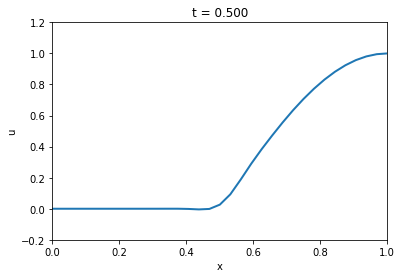

In [10]:
anim = create_animation(sine_solution_list, sine_time_list)
HTML(anim.to_html5_video())

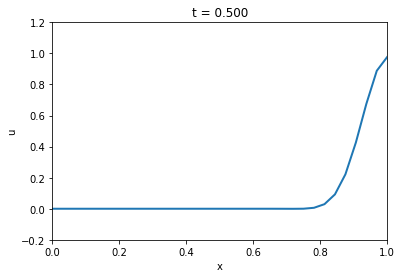

In [19]:
anim = create_animation(gaussian_solution_list, gaussian_time_list)
HTML(anim.to_html5_video())

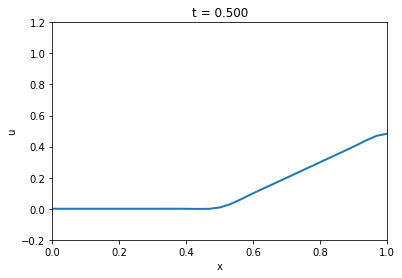

In [24]:
anim = create_animation(triangle_solution_list, triangle_time_list)
HTML(anim.to_html5_video())

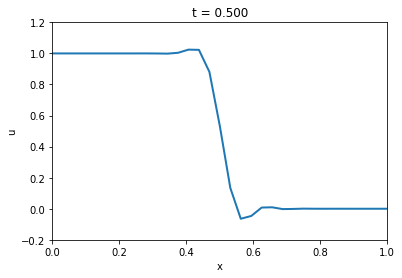

In [28]:
anim = create_animation(step_solution_list, step_time_list)
HTML(anim.to_html5_video())